
# **BiotrAIn 2025 Tutorial: Data integration for microbiome research using scikit-bio**


# Section 04: Clustering(40 min)

- Time: 8:55 - 9:30:00 EDT, Jul 11, 2025
Welcome to the practical session 01. created by Nelly Selem (Secodment host), Jeanett Daga (Secodment), with modifications by professor Qiyun Zhu (on behalf of Daniel McDonald).

🏆 QUESTIONS

What are the differences in microbial community composition between samples from distinct environments or conditions?

🎯 AIMS

To analyze and compare the microbial community composition between samples from different environments or conditions using beta diversity metrics.

To apply UniFrac (both weighted and unweighted) as a phylogeny-based distance measure for assessing differences in microbial communities.

To visualize these differences through Non-Metric Multidimensional Scaling (NMDS) ordination plots.

🔑 KEY POINTS

Beta diversity

UniFrac

NMDS

Non-metric multidimensional scaling (NMDS)


### Background

Beta diversity measures the differences in microbial community composition between different environments or samples. It captures how distinct or similar microbial communities are across spatial or environmental gradients.

In this workshop section, we will focus on beta-diversity using:

1. Bray-Curtis dissimilarity (based on abundance data) and Jaccard index (based on presence/absence), Heatmaps to show pairwise dissimilarity or abundance patterns.

2. UniFrac, on shotgun data from the EMP500 dataset. We will apply UniFrac which is a popular phylogenetic beta-diversity metric. The similarity computed is the **uni**que **frac**tion of the phylogenetic branch length between a pair of samples.

3. Principal Coordinates Analysis (PCoA): Visualizes multivariate dissimilarities in 2D or 3D space. Samples closer together have more similar communities, and Non-metric Multidimensional Scaling (NMDS): Another ordination method for representing similarity patterns.

4. Apply PERMANOVA (Permutational Multivariate Analysis of Variance) to test for significant differences among groups of samples.

5. Last, to further explore the capabilities of scikit-bio, we will  test whether sample similarities are correlated between two prevalent phyla using both a Mantel test and Procrustes analysis.

## Preparation

Install the latest version of scikit-bio if it hasn't been (needed for every Google Colab instance).

In [ ]:
from importlib.util import find_spec

In [ ]:
if find_spec('skbio') is None:
    !pip install -q scikit-bio

In [ ]:
import skbio
skbio.__version__

'0.6.3'

In [ ]:
import pandas as pd

In [ ]:
from skbio import Table



we are using the following data to make a Beta biodiversity analysis To compute and visualize beta diversity, you need:

1. Sample metadata (latam_samples.tsv): environmental metadata per sample.
2. feature table (latam_ogu.biom)counts of microbial taxa (OGUs) per sample.
3. Phylogenetic tree (latam_ogu.nwk)for UniFrac.
4. Taxonomy Taxonomy assignment file (latam_ogu.tax). for heatmaps

In [ ]:
# prompt: Create a text variable to use after as a path to read files https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/
github_latam_data = "https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/"

In [ ]:
# prompt: generate the metadata path by joining github_data_path with "emp500/sample.tsv"
metadata_path = github_latam_data + "latam/latam_samples.tsv"
metadata_path
#sample_df = pd.read_csv(metadata_path, sep='\t')
#sample_df.head(2)
# Read the TSV file directly from the URL into a pandas DataFrame
sample_df = pd.read_csv(metadata_path, sep='\t', low_memory=False, index_col='sample_name')
sample_df.head(2)

,sample_name_original,sample_type,collection_timestamp,country,depth_sample,description,elevation,emp500_principal_investigator,emp500_study_id,emp500_pi_study_id,...,env_feature,env_material,env_package,geo_loc_name,host_subject_id,host_scientific_name,latitude,longitude,project_name,scientific_name
sample_name,,,,,,,,,,,,,,,,,,,,,
13114.jensen.43.s012,Jensen43.MX12.189,sediment,07/02/2012,Mexico,15.0,Jensen43.sediment.11,0.0,Jensen,43,Jensen43,...,marine subtidal rocky reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-189,not applicable,21.02361,-86.77158,Jensen sediments from global ocean,marine sediment metagenome
13114.jensen.43.s013,Jensen43.MX12.213,sediment,07/04/2012,Mexico,15.0,Jensen43.sediment.12,0.0,Jensen,43,Jensen43,...,marine reef,marine sediment,sediment,Atlantic Ocean:Northwest Atlantic Ocean:Mexica...,MX12-213,not applicable,20.33194,-87.02712,Jensen sediments from global ocean,marine sediment metagenome


In [ ]:
# prompt: generate the metadata path by joining github_data_path with "emp500/sample.tsv"
biom_path = github_latam_data + "latam/shotgun/latam_ogu.biom"
biom_df = Table.read(biom_path)
latam_df = biom_df.to_dataframe()
latam_df = latam_df.T
latam_df.head()

,G000005825,G000006175,G000006605,G000006725,G000006745,G000006785,G000006845,G000006865,G000006925,G000006965,...,G902812375,G902812395,G902825795,G902825845,G902825965,G902826025,G902826465,G902826605,G902827015,G902827055
13114.jensen.43.s012,0,0,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,23.0,0,1.0,0,0
13114.jensen.43.s013,0,0,0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0,0,0,0
13114.jensen.43.s014,0,0,0,0,0,0,0,0,1.0,0,...,0,0,0,0,0,0,0,0,2.0,0
13114.pinto.63.s001,0,0,0,0,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.pinto.63.s002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Clustering with Bray-Curtis dissimilarity



Bray-Curtis dissimilarity is a metric that quantifies how different two ecological communities are, based on the abundance of species. It ranges from 0 to 1:

    0 = the two samples are identical in species composition and relative abundance.

    1 = the two samples share no species in common.

In microbiome our data research it captures how community structure varies, not just who is present, but how abundant each microbe is. helping identify biogeographic patterns, ecological gradients, or the effect of environmental factors (like salinity, depth, host, etc.). It’s robust to rare species and common in diversity analysis (e.g., heatmaps, clustering, PCoA).

In [ ]:
# prompt: for this table get the Bray curtis metrics from  latam_df_T = latam_df.T. if we need to import some libraries and how interpretate the results and make a data frame of the results

from skbio.diversity import beta_diversity

# Calculate Bray-Curtis distances
bray_curtis_dm = beta_diversity("braycurtis", latam_df)

# Convert the distance matrix to a pandas DataFrame
bray_curtis_df = bray_curtis_dm.to_data_frame()

# Print the distance matrix DataFrame
bray_curtis_df

,13114.jensen.43.s012,13114.jensen.43.s013,13114.jensen.43.s014,13114.pinto.63.s001,13114.pinto.63.s002,13114.pinto.63.s003,13114.pinto.63.s004,13114.pinto.63.s005,13114.pinto.63.s006,13114.pinto.63.s007,...,13114.stewart.26.s006,13114.stewart.26.s007,13114.stewart.26.s008,13114.zaneveld.9.s004,13114.zaneveld.9.s005,13114.zaneveld.9.s006,13114.zaneveld.9.s010,13114.zaneveld.9.s011,13114.zaneveld.9.s012,13114.zaneveld.9.s022
13114.jensen.43.s012,0.000000,0.867183,0.901598,0.964110,0.956639,0.975633,0.976081,0.981495,0.980003,0.979527,...,0.994312,0.997163,0.998157,0.948296,0.958420,0.952129,0.943006,0.979697,0.942797,0.994398
13114.jensen.43.s013,0.867183,0.000000,0.795822,0.977721,0.960503,0.988895,0.989959,0.992187,0.991778,0.992676,...,0.996209,0.998535,0.998917,0.965464,0.976519,0.966550,0.907557,0.928046,0.920523,0.997698
13114.jensen.43.s014,0.901598,0.795822,0.000000,0.678520,0.884550,0.939068,0.978650,0.976928,0.966732,0.912751,...,0.997457,0.999012,0.999395,0.920811,0.879102,0.897510,0.857250,0.954728,0.906540,0.998177
13114.pinto.63.s001,0.964110,0.977721,0.678520,0.000000,0.494747,0.596839,0.713226,0.722782,0.693845,0.682477,...,0.998211,0.998760,0.999501,0.697125,0.643175,0.675881,0.880331,0.959067,0.769249,0.998425
13114.pinto.63.s002,0.956639,0.960503,0.884550,0.494747,0.000000,0.725455,0.814165,0.818496,0.798673,0.830827,...,0.998233,0.999125,0.999620,0.710666,0.730960,0.710650,0.802728,0.913976,0.705056,0.998793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114.zaneveld.9.s006,0.952129,0.966550,0.897510,0.675881,0.710650,0.761349,0.814067,0.834907,0.809271,0.806117,...,0.997851,0.998021,0.999345,0.125125,0.207970,0.000000,0.818097,0.951987,0.686603,0.997035
13114.zaneveld.9.s010,0.943006,0.907557,0.857250,0.880331,0.802728,0.935888,0.955373,0.959651,0.958204,0.961448,...,0.998291,0.999127,0.999511,0.737869,0.830678,0.818097,0.000000,0.760697,0.359395,0.997665
13114.zaneveld.9.s011,0.979697,0.928046,0.954728,0.959067,0.913976,0.980142,0.987190,0.987830,0.987616,0.989126,...,0.999567,0.999689,0.999799,0.946851,0.964264,0.951987,0.760697,0.000000,0.861976,0.999473
13114.zaneveld.9.s012,0.942797,0.920523,0.906540,0.769249,0.705056,0.857442,0.898719,0.905781,0.903300,0.910814,...,0.998354,0.998994,0.999394,0.604550,0.723807,0.686603,0.359395,0.861976,0.000000,0.997415


In [ ]:
import seaborn as sns

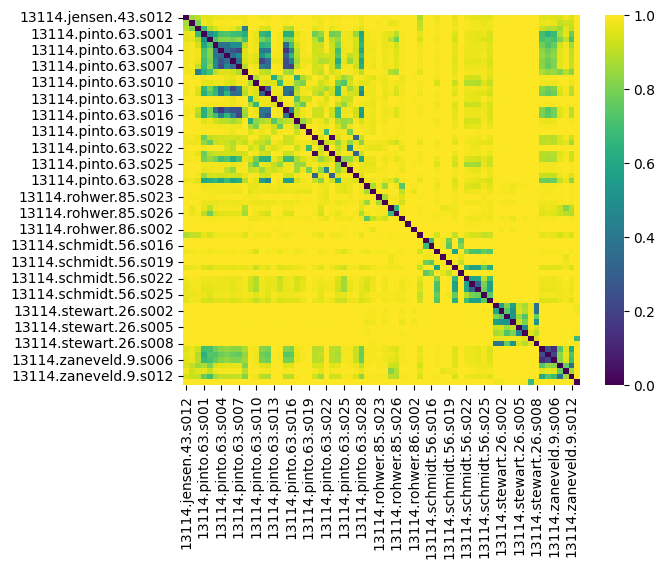

In [ ]:
heatmap = sns.heatmap(bray_curtis_df, cmap='viridis')

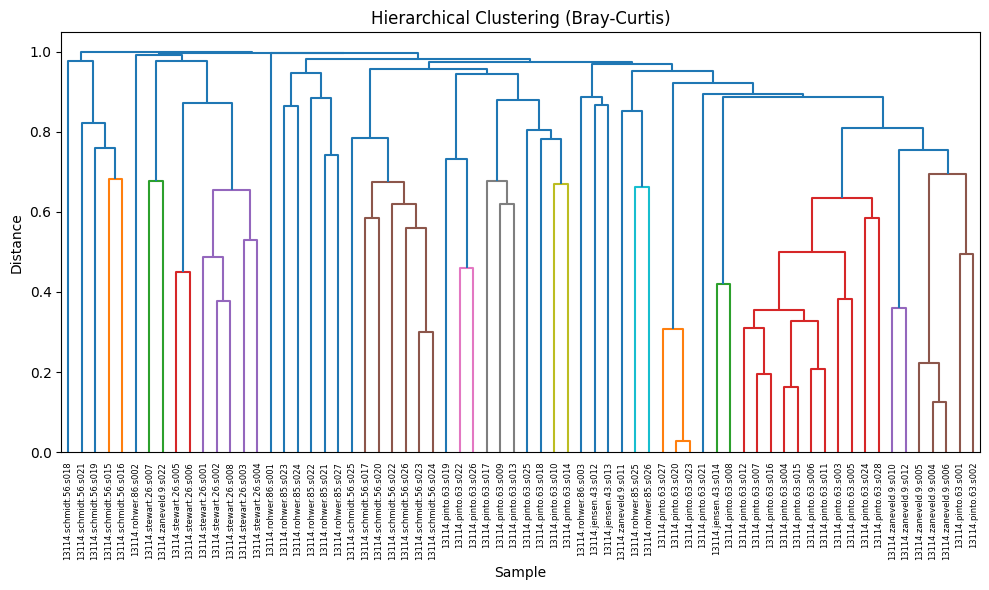

In [ ]:
#1. Hierarchical Clustering (Agglomerative)
#Good for dendrograms and visual grouping

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

# Convert the square distance matrix to condensed format
condensed = squareform(bray_curtis_df.values)

# Perform hierarchical clustering
linkage_matrix = linkage(condensed, method='average')  # or 'ward', 'complete', 'single'

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=bray_curtis_df.index)
plt.title("Hierarchical Clustering (Bray-Curtis)")
plt.xlabel("Sample")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


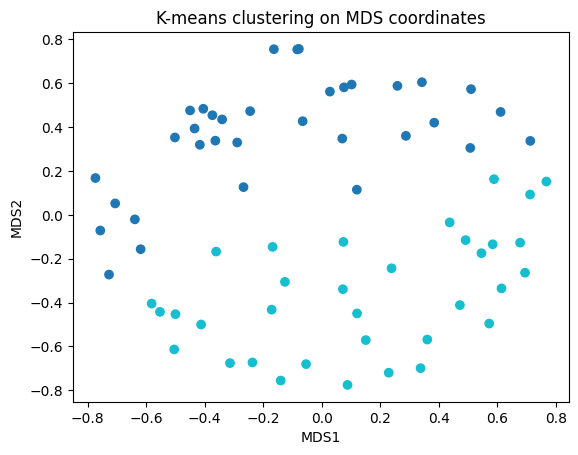

In [ ]:
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

# Convert distance matrix to coordinates using MDS (like PCoA)
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
coords = mds.fit_transform(bray_curtis_df.values)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(coords)

# Visualize
plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='tab10')
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.title("K-means clustering on MDS coordinates")
plt.show()

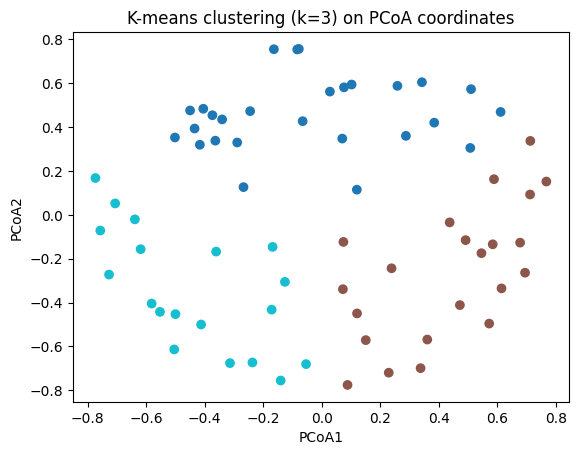

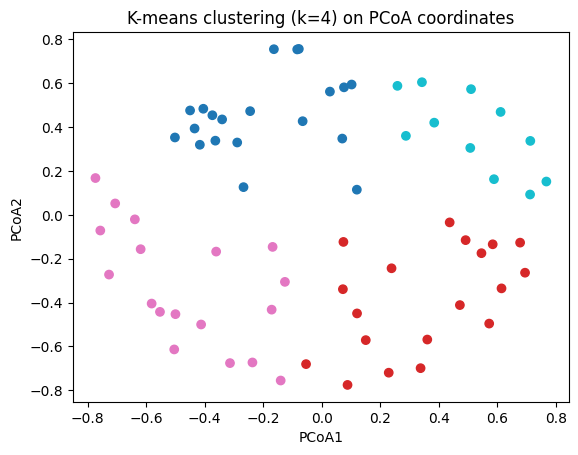

In [ ]:
# prompt: k means with pcoa coordinates

import matplotlib.pyplot as plt
# Apply K-means clustering with a different number of clusters (e.g., 3)
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(coords)

# Visualize the K-means clustering with 3 clusters
plt.scatter(coords[:, 0], coords[:, 1], c=labels_3, cmap='tab10')
plt.xlabel("PCoA1")
plt.ylabel("PCoA2")
plt.title("K-means clustering (k=3) on PCoA coordinates")
plt.show()

# You can also try different numbers of clusters and evaluate results
# using metrics like the elbow method or silhouette score (not implemented here)

# Example: K-means clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
labels_4 = kmeans_4.fit_predict(coords)

# Visualize the K-means clustering with 4 clusters
plt.scatter(coords[:, 0], coords[:, 1], c=labels_4, cmap='tab10')
plt.xlabel("PCoA1")
plt.ylabel("PCoA2")
plt.title("K-means clustering (k=4) on PCoA coordinates")
plt.show()


Kmeans latam

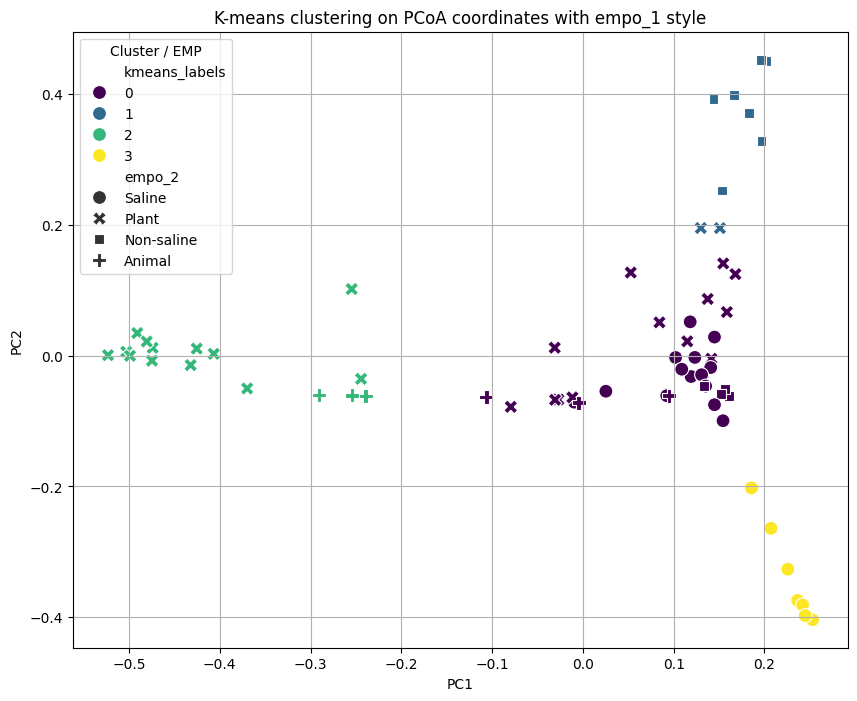

In [ ]:
# prompt: calculate the same k means graph with pcoA, and additional to color add dot form separating by metadata empo_1

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import skbio.stats.ordination

# Perform PCoA
pcoa = skbio.stats.ordination.pcoa(bray_curtis_dm)

# Get coordinates
pcoa_coords = pcoa.samples[['PC1', 'PC2']]

# Add metadata information to the coordinates
# Access the index name directly for merging
pcoa_coords_meta = pcoa_coords.merge(sample_df[['empo_2']], left_index=True, right_index=True)

# Apply K-means clustering to the PCoA coordinates
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Add n_init to suppress future warning
pcoa_coords_meta['kmeans_labels'] = kmeans.fit_predict(pcoa_coords_meta[['PC1', 'PC2']])

# Visualize
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pcoa_coords_meta, x='PC1', y='PC2', hue='kmeans_labels', style='empo_2', palette='viridis', s=100)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means clustering on PCoA coordinates with empo_1 style")
plt.legend(title='Cluster / EMP')
plt.grid(True)
plt.show()

In [ ]:
DBscan latam

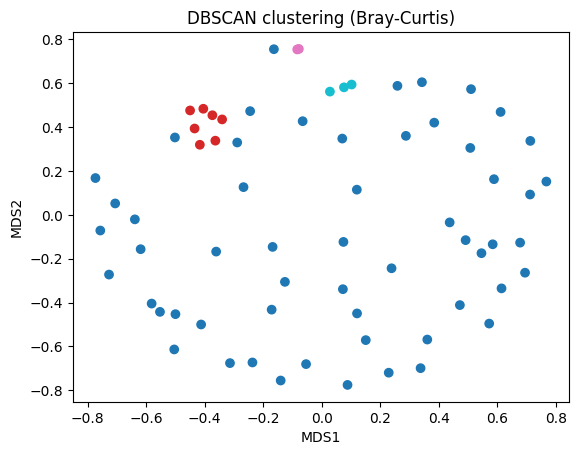

In [ ]:
from sklearn.cluster import DBSCAN

# Use MDS coordinates from above
dbscan = DBSCAN(eps=0.3, min_samples=2, metric='precomputed')
labels = dbscan.fit_predict(bray_curtis_df.values)

# Plot
plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='tab10')
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.title("DBSCAN clustering (Bray-Curtis)")
plt.show()

<ipython-input-17-b60844a25cc7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcoa_coords['dbscan_labels'] = dbscan.fit_predict(pcoa_coords[['PC1', 'PC2']])


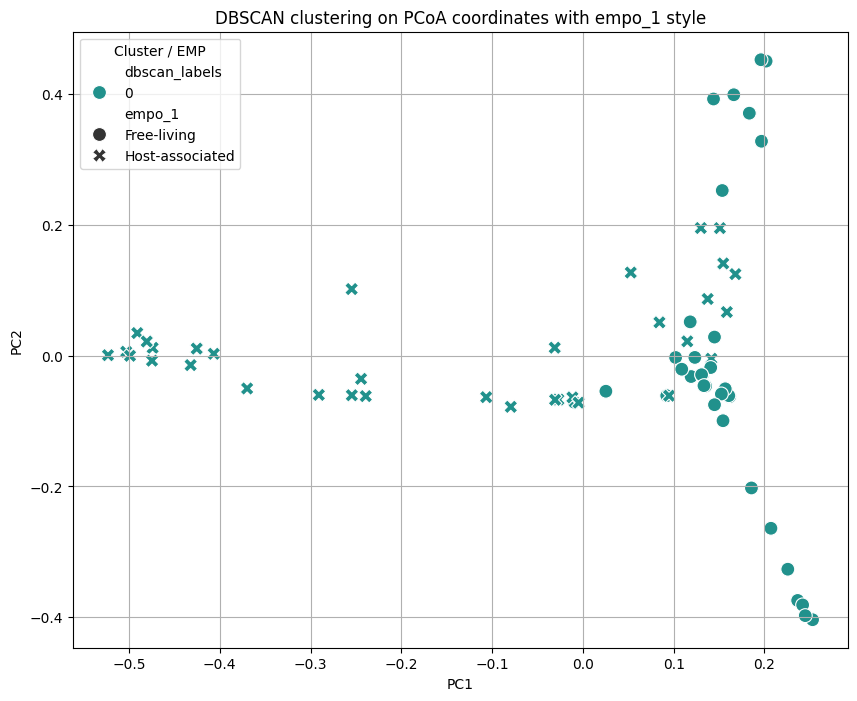

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import skbio.stats.ordination
import pandas as pd # Ensure pandas is imported

# Perform PCoA
pcoa = skbio.stats.ordination.pcoa(bray_curtis_dm)

# Get coordinates
pcoa_coords = pcoa.samples[['PC1', 'PC2']]

# Apply DBSCAN clustering to the PCoA coordinates
# Adjust eps and min_samples as needed for your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
pcoa_coords['dbscan_labels'] = dbscan.fit_predict(pcoa_coords[['PC1', 'PC2']])

# Add metadata for visualization
# Merge pcoa_coords with sample_df using their indices
# Ensure sample_df has 'empo_1' column and the index is sample names
# Based on previous cells, sample_df index should be sample names
pcoa_coords_meta = pcoa_coords.merge(sample_df[['empo_1']], left_index=True, right_index=True)

# Visualize the DBSCAN clustering on PCoA coordinates
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pcoa_coords_meta, x='PC1', y='PC2', hue='dbscan_labels', style='empo_1', palette='viridis', s=100)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN clustering on PCoA coordinates with empo_1 style")
plt.legend(title='Cluster / EMP')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


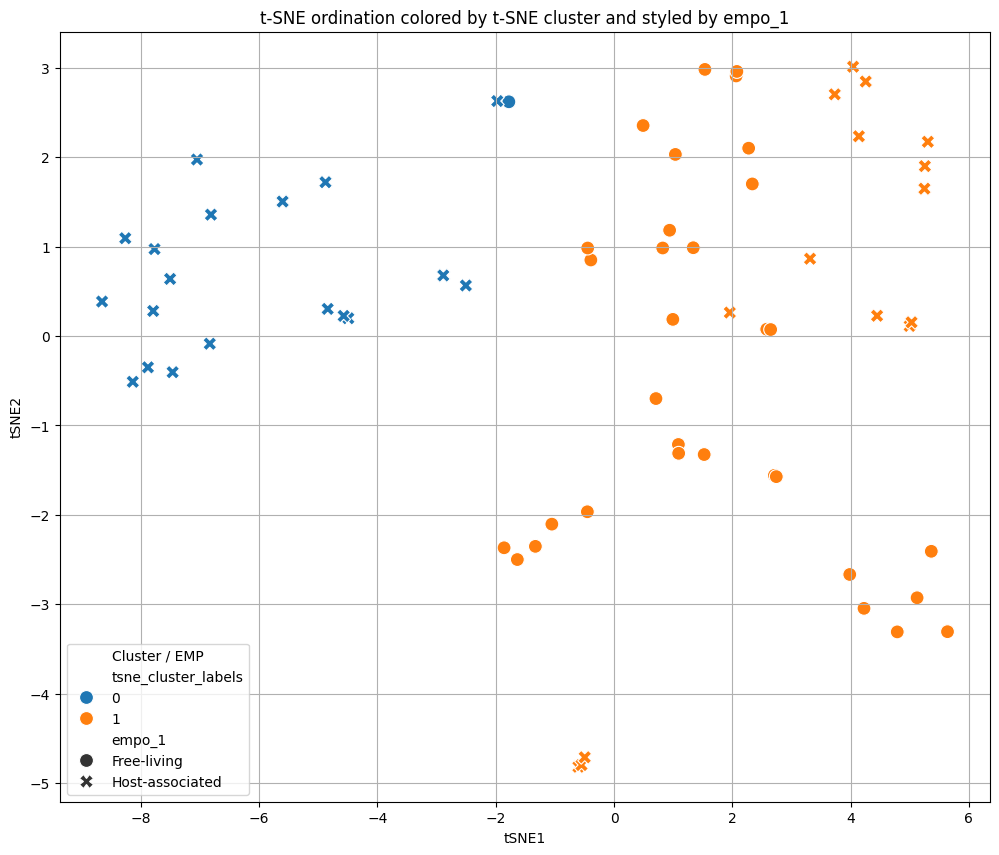

In [ ]:
# prompt: same graph but color by tsne cluster and with form empo_1

import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported if not already
from sklearn.manifold import TSNE # Import TSNE
from sklearn.cluster import KMeans
import seaborn as sns

# Perform t-SNE dimensionality reduction
# You need to apply t-SNE to the distance matrix or the original data.
# Since we have the Bray-Curtis distance matrix (bray_curtis_df), we'll use that.
# Note: t-SNE typically works better on raw features rather than distance matrices,
# but for demonstration purposes and given the context, we will apply it to the distance matrix.
# For large datasets, this might be computationally expensive.

# The number of components is typically 2 or 3 for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300) # Adjust parameters as needed
# Apply t-SNE to the Bray-Curtis distance matrix values
tsne_coords = tsne.fit_transform(bray_curtis_df.values)

# Create a DataFrame for the t-SNE coordinates with sample names as index
tsne_coords_df = pd.DataFrame(tsne_coords, index=bray_curtis_df.index, columns=['tSNE1', 'tSNE2'])

# Now merge using the index
tsne_coords_meta = tsne_coords_df.merge(sample_df[['empo_1']], left_index=True, right_index=True)


# Apply K-means clustering to the t-SNE coordinates
# Decide on the number of clusters - for demonstration, let's use 4
kmeans_tsne = KMeans(n_clusters=2, random_state=42, n_init=10)
tsne_coords_meta['tsne_cluster_labels'] = kmeans_tsne.fit_predict(tsne_coords_meta[['tSNE1', 'tSNE2']])

# Visualize the t-SNE ordination, coloring by the t-SNE cluster labels and styling by 'empo_1'
plt.figure(figsize=(12, 10))
sns.scatterplot(data=tsne_coords_meta, x='tSNE1', y='tSNE2', hue='tsne_cluster_labels', style='empo_1', palette='tab10', s=100)
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
plt.title("t-SNE ordination colored by t-SNE cluster and styled by empo_1")
plt.legend(title='Cluster / EMP')
plt.grid(True)
plt.show()

## Repeat with whole dataset

In [ ]:
# prompt: generate the metadata path by joining github_data_path with "emp500/sample.tsv"
metadata_path = github_latam_data + "emp500/sample.tsv"
metadata_path
sample_df = pd.read_csv(metadata_path, sep='\t')
sample_df.head(2)
# prompt: generate the metadata path by joining github_data_path with "emp500/sample.tsv"
biom_path = github_latam_data + "emp500/shotgun/ogu.biom"
biom_df = Table.read(biom_path)
latam_df = biom_df.to_dataframe()
latam_df = latam_df.T
latam_df.head()

,G000005825,G000006175,G000006605,G000006725,G000006745,G000006785,G000006845,G000006865,G000006925,G000006965,...,G902812375,G902812395,G902825795,G902825845,G902825965,G902826025,G902826465,G902826605,G902827015,G902827055
13114.angenent.65.s001,120.0,0,1.0,11.0,0,0,0,0,6.0,3.0,...,0,0,0,0,0,0,0,0,0,0
13114.angenent.65.s002,0,0,4.0,9.0,0,0,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
13114.angenent.65.s003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.angenent.65.s004,0,0,1.0,0,0,0,0,2.0,16.0,2.0,...,0,0,0,0,0,0,0,0,0,0
13114.angenent.65.s005,51.0,0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# prompt: for this table get the Bray curtis metrics from  latam_df_T = latam_df.T. if we need to import some libraries and how interpretate the results and make a data frame of the results

from skbio.diversity import beta_diversity

# Calculate Bray-Curtis distances
bray_curtis_dm = beta_diversity("braycurtis", latam_df)

# Convert the distance matrix to a pandas DataFrame
bray_curtis_df = bray_curtis_dm.to_data_frame()

# Print the distance matrix DataFrame
bray_curtis_df

,13114.angenent.65.s001,13114.angenent.65.s002,13114.angenent.65.s003,13114.angenent.65.s004,13114.angenent.65.s005,13114.angenent.65.s006,13114.angenent.65.s007,13114.angenent.65.s008,13114.angenent.65.s009,13114.berry.2.s001,...,13114.zaneveld.9.s013,13114.zaneveld.9.s014,13114.zaneveld.9.s015,13114.zaneveld.9.s016,13114.zaneveld.9.s017,13114.zaneveld.9.s018,13114.zaneveld.9.s019,13114.zaneveld.9.s020,13114.zaneveld.9.s021,13114.zaneveld.9.s022
13114.angenent.65.s001,0.000000,0.912729,0.958519,0.905751,0.866292,0.927403,0.830090,0.935140,0.957101,0.998893,...,0.999309,0.999020,0.995519,0.998613,0.999014,0.999694,0.999792,0.999056,0.999495,0.999612
13114.angenent.65.s002,0.912729,0.000000,0.963464,0.925959,0.924527,0.936963,0.879782,0.948168,0.706090,0.999127,...,0.999363,0.999292,0.995438,0.998794,0.999072,0.999661,0.999724,0.999173,0.999594,0.999598
13114.angenent.65.s003,0.958519,0.963464,0.000000,0.482088,0.823006,0.419026,0.706358,0.424648,0.958123,0.995494,...,0.995531,0.995030,0.995806,0.990724,0.995583,0.997104,0.997723,0.994066,0.999781,0.999712
13114.angenent.65.s004,0.905751,0.925959,0.482088,0.000000,0.784451,0.490919,0.581797,0.309078,0.958022,0.993932,...,0.990139,0.990701,0.992339,0.985292,0.986520,0.995833,0.997172,0.986434,0.998698,0.999187
13114.angenent.65.s005,0.866292,0.924527,0.823006,0.784451,0.000000,0.653235,0.598170,0.813961,0.699480,0.996952,...,0.997893,0.997554,0.993459,0.995479,0.996392,0.998158,0.998537,0.997031,0.999049,0.999169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114.zaneveld.9.s018,0.999694,0.999661,0.997104,0.995833,0.998158,0.995236,0.997717,0.996092,0.999603,0.947579,...,0.859378,0.660460,0.995998,0.810296,0.751007,0.000000,0.627301,0.631772,0.998980,0.998279
13114.zaneveld.9.s019,0.999792,0.999724,0.997723,0.997172,0.998537,0.995799,0.998251,0.997065,0.999668,0.948983,...,0.902770,0.722572,0.997686,0.872439,0.804423,0.627301,0.000000,0.816751,0.998996,0.998356
13114.zaneveld.9.s020,0.999056,0.999173,0.994066,0.986434,0.997031,0.991638,0.993657,0.990970,0.999093,0.951076,...,0.707863,0.668240,0.980885,0.701173,0.714496,0.631772,0.816751,0.000000,0.998555,0.997713
13114.zaneveld.9.s021,0.999495,0.999594,0.999781,0.998698,0.999049,0.999509,0.998960,0.999650,0.999666,0.998846,...,0.979688,0.998388,0.977980,0.997414,0.993340,0.998980,0.998996,0.998555,0.000000,0.804026


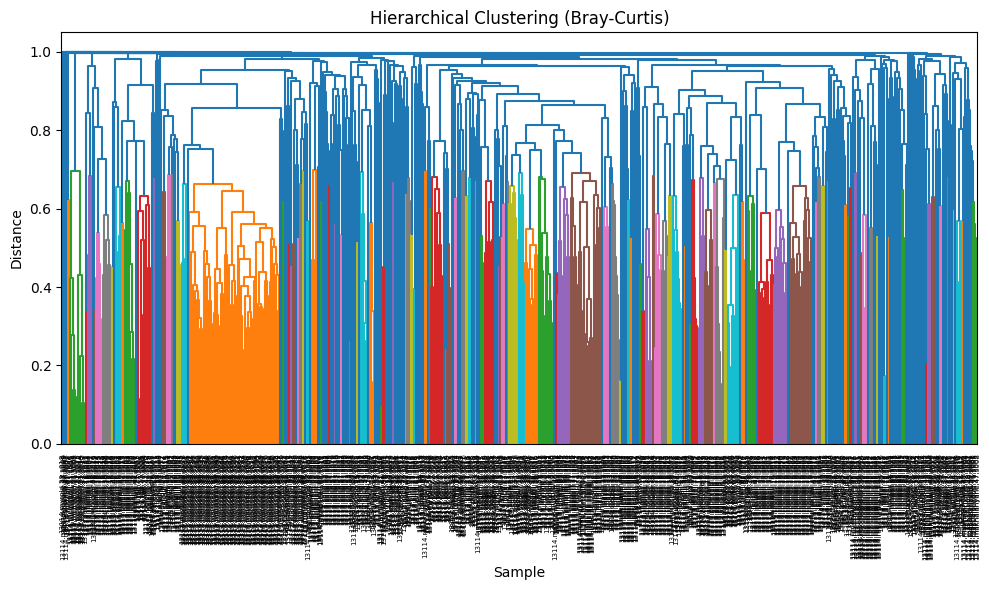

In [ ]:
#1. Hierarchical Clustering (Agglomerative)
#Good for dendrograms and visual grouping

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

# Convert the square distance matrix to condensed format
condensed = squareform(bray_curtis_df.values)

# Perform hierarchical clustering
linkage_matrix = linkage(condensed, method='average')  # or 'ward', 'complete', 'single'

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=bray_curtis_df.index)
plt.title("Hierarchical Clustering (Bray-Curtis)")
plt.xlabel("Sample")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


<ipython-input-25-b60844a25cc7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pcoa_coords['dbscan_labels'] = dbscan.fit_predict(pcoa_coords[['PC1', 'PC2']])
<ipython-input-25-b60844a25cc7>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=pcoa_coords_meta, x='PC1', y='PC2', hue='dbscan_labels', style='empo_1', palette='viridis', s=100)
<ipython-input-25-b60844a25cc7>:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Cluster / EMP')


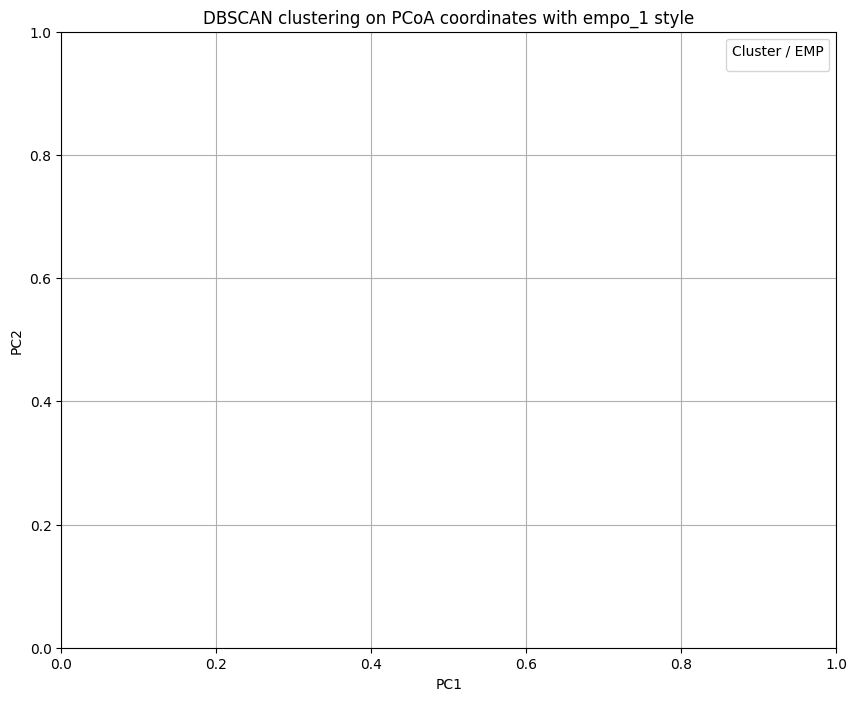

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import skbio.stats.ordination
import pandas as pd # Ensure pandas is imported

# Perform PCoA
pcoa = skbio.stats.ordination.pcoa(bray_curtis_dm)

# Get coordinates
pcoa_coords = pcoa.samples[['PC1', 'PC2']]

# Apply DBSCAN clustering to the PCoA coordinates
# Adjust eps and min_samples as needed for your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
pcoa_coords['dbscan_labels'] = dbscan.fit_predict(pcoa_coords[['PC1', 'PC2']])

# Add metadata for visualization
# Merge pcoa_coords with sample_df using their indices
# Ensure sample_df has 'empo_1' column and the index is sample names
# Based on previous cells, sample_df index should be sample names
pcoa_coords_meta = pcoa_coords.merge(sample_df[['empo_1']], left_index=True, right_index=True)

# Visualize the DBSCAN clustering on PCoA coordinates
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pcoa_coords_meta, x='PC1', y='PC2', hue='dbscan_labels', style='empo_1', palette='viridis', s=100)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN clustering on PCoA coordinates with empo_1 style")
plt.legend(title='Cluster / EMP')
plt.grid(True)
plt.show()

## Exercise # 4.1 Clusetring with Jaccard metric

In [ ]:
# Binarizar el dataframe (presencia/ausencia)
latam_df_binary = (latam_df > 0).astype(int)
latam_df_binary.head()


,G000005825,G000006175,G000006605,G000006725,G000006745,G000006785,G000006845,G000006865,G000006925,G000006965,...,G902812375,G902812395,G902825795,G902825845,G902825965,G902826025,G902826465,G902826605,G902827015,G902827055
13114.jensen.43.s012,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
13114.jensen.43.s013,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13114.jensen.43.s014,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
13114.pinto.63.s001,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.pinto.63.s002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
jaccard_dm = beta_diversity("jaccard", latam_df_binary)
jaccard_df = jaccard_dm.to_data_frame()
jaccard_df

,13114.jensen.43.s012,13114.jensen.43.s013,13114.jensen.43.s014,13114.pinto.63.s001,13114.pinto.63.s002,13114.pinto.63.s003,13114.pinto.63.s004,13114.pinto.63.s005,13114.pinto.63.s006,13114.pinto.63.s007,...,13114.stewart.26.s006,13114.stewart.26.s007,13114.stewart.26.s008,13114.zaneveld.9.s004,13114.zaneveld.9.s005,13114.zaneveld.9.s006,13114.zaneveld.9.s010,13114.zaneveld.9.s011,13114.zaneveld.9.s012,13114.zaneveld.9.s022
13114.jensen.43.s012,0.000000,0.685239,0.842507,0.935381,0.926755,0.927890,0.913415,0.927083,0.926444,0.914347,...,0.854079,0.759064,0.821874,0.889849,0.894593,0.895279,0.923993,0.952989,0.921440,0.706720
13114.jensen.43.s013,0.685239,0.000000,0.798991,0.946271,0.942408,0.955083,0.937202,0.951576,0.946809,0.948698,...,0.837468,0.814600,0.839612,0.893409,0.897010,0.893476,0.930543,0.960600,0.921717,0.791247
13114.jensen.43.s014,0.842507,0.798991,0.000000,0.903226,0.915601,0.883994,0.915612,0.911323,0.933142,0.896254,...,0.930779,0.912212,0.927369,0.857554,0.843703,0.856721,0.878092,0.926733,0.881064,0.902861
13114.pinto.63.s001,0.935381,0.946271,0.903226,0.000000,0.635688,0.689655,0.672727,0.645545,0.700777,0.652893,...,0.966752,0.944322,0.961296,0.779174,0.760994,0.768657,0.756563,0.763006,0.758264,0.945783
13114.pinto.63.s002,0.926755,0.942408,0.915601,0.635688,0.000000,0.766942,0.699313,0.727273,0.697757,0.716724,...,0.971839,0.947569,0.964301,0.819970,0.808917,0.805031,0.794175,0.810811,0.803754,0.945838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114.zaneveld.9.s006,0.895279,0.893476,0.856721,0.768657,0.805031,0.778182,0.795414,0.800676,0.855395,0.782765,...,0.950128,0.919946,0.938126,0.550308,0.525164,0.000000,0.662592,0.752747,0.677215,0.902098
13114.zaneveld.9.s010,0.923993,0.930543,0.878092,0.756563,0.794175,0.777523,0.782998,0.795359,0.871990,0.783296,...,0.965588,0.946296,0.959222,0.659574,0.628205,0.662592,0.000000,0.561644,0.538922,0.936684
13114.zaneveld.9.s011,0.952989,0.960600,0.926733,0.763006,0.810811,0.753541,0.754144,0.789873,0.877465,0.788043,...,0.979740,0.960476,0.976132,0.765625,0.737143,0.752747,0.561644,0.000000,0.665541,0.961985
13114.zaneveld.9.s012,0.921440,0.921717,0.881064,0.758264,0.803754,0.756592,0.766798,0.789963,0.849348,0.783890,...,0.964683,0.935863,0.955464,0.657676,0.648352,0.677215,0.538922,0.665541,0.000000,0.926271


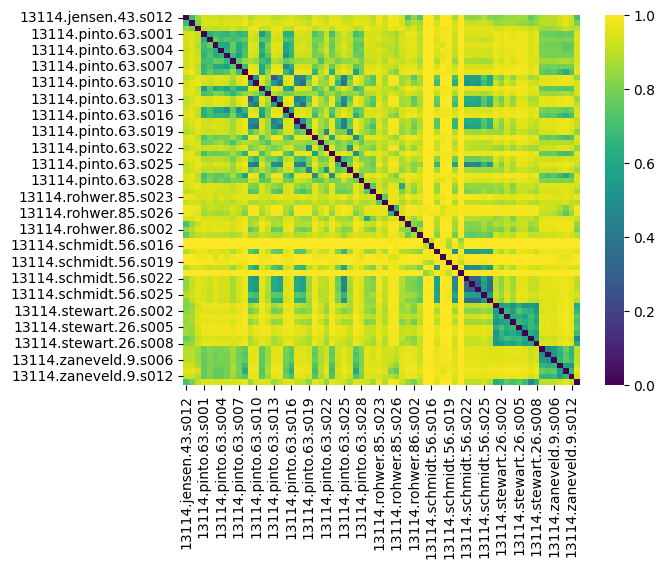

In [ ]:
heatmap = sns.heatmap(jaccard_df, cmap='viridis')